## ExclusiveOr

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(565113221)

In [58]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])
color_map = lambda x:'b' if x == 0 else 'r'
color = [color_map(y[i,0]) for i in range(y.shape[0])]

In [33]:
color

['b', 'r', 'r', 'b']

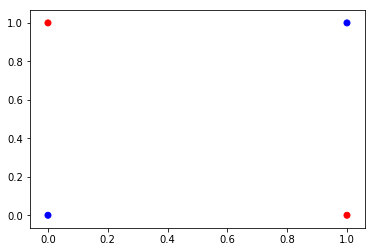

In [34]:
plt.scatter(X[:,0],X[:,1],color=color)

In [48]:
epsilon = 0.12
W1 = np.random.random((2,2)) * epsilon * 2 - epsilon
b1 = np.random.random((2,1)) * epsilon * 2 - epsilon
W2 = np.random.random((1,2)) * epsilon * 2 - epsilon
b2 = np.random.random((1,1)) * epsilon * 2 - epsilon

In [49]:
print('W1',W1)
print('W2',W2)
print('b1',b1)
print('b2',b2)

W1 [[ 0.07384877 -0.02920231]
 [-0.07034652 -0.05832571]]
W2 [[-0.03474263  0.10155277]]
b1 [[-0.07141931]
 [ 0.04901775]]
b2 [[0.02163656]]


In [50]:
def sigmoid(x):
    return 1/(1+np.power(np.e,-x))

In [86]:
def forward(x,W1,W2,b1,b2):
    a = W1.dot(x)
    z = sigmoid(a+b1)
    b = W2.dot(z)
    y = sigmoid(b+b2)
    return a,z,b,y

In [87]:
epsilon = 0.12
W1 = np.random.random((2,2)) * epsilon * 2 - epsilon
b1 = np.random.random((2,1)) * epsilon * 2 - epsilon
W2 = np.random.random((1,2)) * epsilon * 2 - epsilon
b2 = np.random.random((1,1)) * epsilon * 2 - epsilon
epoch = 50
alpha = 0.01
for turn in range(epoch):
    print('turn:',turn,end=' ')
    epoch_cost = 0
    for index in range(X.shape[0]):
        x = X[index,:].reshape((-1,1))
        y = Y[index,:].reshape((-1,1))
        a,z,b,y_pred = forward(x,W1,W2,b1,b2)
        
        cost = -y.dot(np.log(y_pred)) - (1-y).dot(np.log(1-y_pred))
        epoch_cost += cost
        
        for k in range(W2.shape[0]):
            for j in range(W2.shape[1]):
                W2[k,j] -= alpha * (y_pred - y) * z[j,0]
        
        for k in range(b2.shape[0]):
            b2[k,0] -= alpha * (y_pred - y)
        
        
        for j in range(W1.shape[0]):
            for i in range(W1.shape[1]):
                for k in range(W2.shape[0]):
                    W1[j,i] -= alpha * (y_pred - y) * W2[k,j] * z[j,0] * (1 - z[j,0]) * x[i]
                    
        for j in range(b1.shape[0]):
            b1[j,0] -= alpha * (y_pred - y) * W2[k,j] * z[j,0] * (1 - z[j,0])

    print('cost:',epoch_cost)





turn: 0 cost: [[2.77040988]]
turn: 1 cost: [[2.77041029]]
turn: 2 cost: [[2.77041071]]
turn: 3 cost: [[2.77041113]]
turn: 4 cost: [[2.77041155]]
turn: 5 cost: [[2.77041198]]
turn: 6 cost: [[2.77041241]]
turn: 7 cost: [[2.77041285]]
turn: 8 cost: [[2.77041329]]
turn: 9 cost: [[2.77041373]]
turn: 10 cost: [[2.77041418]]
turn: 11 cost: [[2.77041464]]
turn: 12 cost: [[2.77041509]]
turn: 13 cost: [[2.77041555]]
turn: 14 cost: [[2.77041602]]
turn: 15 cost: [[2.77041649]]
turn: 16 cost: [[2.77041696]]
turn: 17 cost: [[2.77041744]]
turn: 18 cost: [[2.77041792]]
turn: 19 cost: [[2.77041841]]
turn: 20 cost: [[2.7704189]]
turn: 21 cost: [[2.7704194]]
turn: 22 cost: [[2.7704199]]
turn: 23 cost: [[2.7704204]]
turn: 24 cost: [[2.77042091]]
turn: 25 cost: [[2.77042143]]
turn: 26 cost: [[2.77042195]]
turn: 27 cost: [[2.77042247]]
turn: 28 cost: [[2.770423]]
turn: 29 cost: [[2.77042353]]
turn: 30 cost: [[2.77042407]]
turn: 31 cost: [[2.77042462]]
turn: 32 cost: [[2.77042517]]
turn: 33 cost: [[2.7704257

In [77]:
def pred(X,W1,W2,b1,b2):
    y_pred = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
        _,_,_,y_pred[i] = forward(x.reshape((-1,1)),W1,W2,b1,b2)
    return y_pred

In [78]:
pred(X,W1,W2,b1,b2)

array([[0.50171323],
       [0.50171323],
       [0.50171323],
       [0.50171323]])

In [79]:
Y

array([[0],
       [1],
       [1],
       [0]])

In [80]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [88]:
epsilon = 0.12
W1 = np.random.random((2,2)) * epsilon * 2 - epsilon
b1 = np.random.random((2,1)) * epsilon * 2 - epsilon
W2 = np.random.random((1,2)) * epsilon * 2 - epsilon
b2 = np.random.random((1,1)) * epsilon * 2 - epsilon
epoch = 50
alpha = 0.01
for turn in range(epoch):
    print('turn:',turn,end=' ')
    epoch_cost = 0
    azbys = []
    for index in range(X.shape[0]):
        x = X[index,:].reshape((-1,1))
        y = Y[index,:].reshape((-1,1))
        a,z,b,y_pred = forward(x,W1,W2,b1,b2)
        azbys.append((a,z,b,y_pred,y))
    
    
    for a,z,b,y_pred,y in azbys:
        cost = -y.dot(np.log(y_pred)) - (1-y).dot(np.log(1-y_pred))
        epoch_cost += cost

        for k in range(W2.shape[0]):
            for j in range(W2.shape[1]):
                W2[k,j] -= alpha * (y_pred - y) * z[j,0]

        for k in range(b2.shape[0]):
            b2[k,0] -= alpha * (y_pred - y)


        for j in range(W1.shape[0]):
            for i in range(W1.shape[1]):
                for k in range(W2.shape[0]):
                    W1[j,i] -= alpha * (y_pred - y) * W2[k,j] * z[j,0] * (1 - z[j,0]) * x[i]

        for j in range(b1.shape[0]):
            b1[j,0] -= alpha * (y_pred - y) * W2[k,j] * z[j,0] * (1 - z[j,0])

    print('cost:',epoch_cost)





turn: 0 cost: [[2.79017369]]
turn: 1 cost: [[2.79036653]]
turn: 2 cost: [[2.79056147]]
turn: 3 cost: [[2.79075854]]
turn: 4 cost: [[2.79095776]]
turn: 5 cost: [[2.79115916]]
turn: 6 cost: [[2.79136276]]
turn: 7 cost: [[2.79156858]]
turn: 8 cost: [[2.79177664]]
turn: 9 cost: [[2.79198698]]
turn: 10 cost: [[2.79219961]]
turn: 11 cost: [[2.79241456]]
turn: 12 cost: [[2.79263185]]
turn: 13 cost: [[2.79285152]]
turn: 14 cost: [[2.79307358]]
turn: 15 cost: [[2.79329807]]
turn: 16 cost: [[2.793525]]
turn: 17 cost: [[2.7937544]]
turn: 18 cost: [[2.79398631]]
turn: 19 cost: [[2.79422075]]
turn: 20 cost: [[2.79445774]]
turn: 21 cost: [[2.79469731]]
turn: 22 cost: [[2.79493949]]
turn: 23 cost: [[2.79518431]]
turn: 24 cost: [[2.7954318]]
turn: 25 cost: [[2.79568199]]
turn: 26 cost: [[2.7959349]]
turn: 27 cost: [[2.79619056]]
turn: 28 cost: [[2.79644901]]
turn: 29 cost: [[2.79671027]]
turn: 30 cost: [[2.79697438]]
turn: 31 cost: [[2.79724136]]
turn: 32 cost: [[2.79751125]]
turn: 33 cost: [[2.797784

In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(565113221)

def sigmoid(x): # sigmoid function 
    return 1/(1+np.power(np.e,-x))

def forward(x,W1,W2,b1,b2): # feed forward
    a = W1.dot(x)
    z = sigmoid(a+b1)
    b = W2.dot(z)
    y = sigmoid(b+b2)
    return a,z,b,y

def pred(X,W1,W2,b1,b2): # predict
    y_pred = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
        _,_,_,y_pred[i] = forward(x.reshape((-1,1)),W1,W2,b1,b2)
    return y_pred

X = np.array([[0,0],[0,1],[1,0],[1,1]]) # features 4 * 2
Y = np.array([[0],[1],[1],[0]]) # labels 4 * 1

epsilon = 0.12 # initialize all weighs between -0.12 ~ 0.12
W1 = np.random.random((2,2)) * epsilon * 2 - epsilon # map from input to hidden
b1 = np.random.random((2,1)) * epsilon * 2 - epsilon # bias1 
W2 = np.random.random((1,2)) * epsilon * 2 - epsilon # map from hidden to output
b2 = np.random.random((1,1)) * epsilon * 2 - epsilon # bias2
epoch = 50 # maximum training turns
alpha = 0.01 # learning rate
for turn in range(epoch):
    print('turn:',turn,end=' ')
    epoch_cost = 0
    for index in range(X.shape[0]):
        x = X[index,:].reshape((-1,1))
        y = Y[index,:].reshape((-1,1))
        a,z,b,y_pred = forward(x,W1,W2,b1,b2) # feed forward
        
        cost = -y.dot(np.log(y_pred)) - (1-y).dot(np.log(1-y_pred)) # calculate cost
        epoch_cost += cost # calculate cumulative cost of this epoch
        
        for k in range(W2.shape[0]): # update W2
            for j in range(W2.shape[1]):
                W2[k,j] -= alpha * (y_pred - y) * z[j,0]
        
        for k in range(b2.shape[0]): # update b2
            b2[k,0] -= alpha * (y_pred - y)
        
        
        for j in range(W1.shape[0]): # update W1
            for i in range(W1.shape[1]):
                for k in range(W2.shape[0]):
                    W1[j,i] -= alpha * (y_pred - y) * W2[k,j] * z[j,0] * (1 - z[j,0]) * x[i]
                    
        for j in range(b1.shape[0]): # update b1
            b1[j,0] -= alpha * (y_pred - y) * W2[k,j] * z[j,0] * (1 - z[j,0])

    print('cost:',epoch_cost)

    
print('prediction\n',pred(X,W1,W2,b1,b2))
print('ground-truth\n',Y)

turn: 0 cost: [[2.78597329]]
turn: 1 cost: [[2.78580064]]
turn: 2 cost: [[2.78563317]]
turn: 3 cost: [[2.78547074]]
turn: 4 cost: [[2.78531319]]
turn: 5 cost: [[2.78516037]]
turn: 6 cost: [[2.78501215]]
turn: 7 cost: [[2.78486839]]
turn: 8 cost: [[2.78472895]]
turn: 9 cost: [[2.7845937]]
turn: 10 cost: [[2.78446252]]
turn: 11 cost: [[2.78433528]]
turn: 12 cost: [[2.78421187]]
turn: 13 cost: [[2.78409217]]
turn: 14 cost: [[2.78397607]]
turn: 15 cost: [[2.78386346]]
turn: 16 cost: [[2.78375424]]
turn: 17 cost: [[2.7836483]]
turn: 18 cost: [[2.78354555]]
turn: 19 cost: [[2.78344589]]
turn: 20 cost: [[2.78334923]]
turn: 21 cost: [[2.78325547]]
turn: 22 cost: [[2.78316454]]
turn: 23 cost: [[2.78307634]]
turn: 24 cost: [[2.7829908]]
turn: 25 cost: [[2.78290783]]
turn: 26 cost: [[2.78282735]]
turn: 27 cost: [[2.7827493]]
turn: 28 cost: [[2.78267359]]
turn: 29 cost: [[2.78260016]]
turn: 30 cost: [[2.78252894]]
turn: 31 cost: [[2.78245987]]
turn: 32 cost: [[2.78239287]]
turn: 33 cost: [[2.78232

In [17]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(565113221)

def sigmoid(x): # sigmoid function 
    return 1/(1+np.power(np.e,-x))

def forward(x,W1,W2,b1,b2): # feed forward
    a = W1.dot(x)
    z = sigmoid(a+b1)
    b = W2.dot(z)
    y = sigmoid(b+b2)
    return a,z,b,y

def pred(X,W1,W2,b1,b2): # predict
    y_pred = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
        x = X[i,:] # initialize x
        _,_,_,y_pred[i] = forward(x.reshape((-1,1)),W1,W2,b1,b2)
    return y_pred

X = np.array([[0,0],[0,1],[1,0],[1,1]]) # features 4 * 2
Y = np.array([[0],[1],[1],[0]]) # labels 4 * 1

epsilon = 0.12 # initialize all weighs between -0.12 ~ 0.12
W1 = np.random.random((2,2)) * epsilon * 2 - epsilon # map from input to hidden
b1 = np.random.random((2,1)) * epsilon * 2 - epsilon # bias1 
W2 = np.random.random((1,2)) * epsilon * 2 - epsilon # map from hidden to output
b2 = np.random.random((1,1)) * epsilon * 2 - epsilon # bias2
epoch = 10000 # maximum training turns
alpha = 0.1 # learning rate
epoch_cost = np.zeros((epoch,))
for turn in range(epoch):
    print('turn:',turn,end=' ')
    for index in range(X.shape[0]):
        x = X[index,:].reshape((-1,1))
        y = Y[index,:].reshape((-1,1))
        a,z,b,y_pred = forward(x,W1,W2,b1,b2) # feed forward

        cost = -y.dot(np.log(y_pred)) - (1-y).dot(np.log(1-y_pred)) # calculate cost
        epoch_cost[turn] += cost # calculate cumulative cost of this epoch

        origin_W2 = W2.copy() # use origin W2 to update W1 and b1
        
        for k in range(W2.shape[0]): # update W2
            for j in range(W2.shape[1]):
                W2[k,j] -= alpha * (y_pred - y) * z[j,0]

        for k in range(b2.shape[0]): # update b2
            b2[k,0] -= alpha * (y_pred - y)


        for j in range(W1.shape[0]): # update W1
            for i in range(W1.shape[1]):
                for k in range(W2.shape[0]):
                    W1[j,i] -= alpha * (y_pred - y) * origin_W2[k,j] * z[j,0] * (1 - z[j,0]) * x[i]

        for j in range(b1.shape[0]): # update b1
            b1[j,0] -= alpha * (y_pred - y) * origin_W2[k,j] * z[j,0] * (1 - z[j,0])

    print('cost:',epoch_cost[turn])


print('prediction\n',pred(X,W1,W2,b1,b2))
print('ground-truth\n',Y)

turn: 0 cost: 2.8557319549663633
turn: 1 cost: 2.8542587530271812
turn: 2 cost: 2.853171289200523
turn: 3 cost: 2.852366300596038
turn: 4 cost: 2.85176816841571
turn: 5 cost: 2.8513215276401924
turn: 6 cost: 2.850985845581835
turn: 7 cost: 2.8507314485122017
turn: 8 cost: 2.850536611425226
turn: 9 cost: 2.8503854273555493
turn: 10 cost: 2.8502662478281278
turn: 11 cost: 2.850170541502564
turn: 12 cost: 2.850092058917185
turn: 13 cost: 2.850026221235586
turn: 14 cost: 2.8499696728987045
turn: 15 cost: 2.8499199542042746
turn: 16 cost: 2.849875261637008
turn: 17 cost: 2.84983427240948
turn: 18 cost: 2.8497960159925757
turn: 19 cost: 2.849759780036649
turn: 20 cost: 2.8497250414656006
turn: 21 cost: 2.849691415999226
turn: 22 cost: 2.849658621168231
turn: 23 cost: 2.8496264492096954
turn: 24 cost: 2.849594747199016
turn: 25 cost: 2.8495634024827527
turn: 26 cost: 2.8495323319952246
turn: 27 cost: 2.8495014744211193
turn: 28 cost: 2.8494707844440663
turn: 29 cost: 2.8494402285244593
turn: 

turn: 381 cost: 2.840998557955026
turn: 382 cost: 2.840980559320643
turn: 383 cost: 2.8409625902127025
turn: 384 cost: 2.840944650575086
turn: 385 cost: 2.8409267403515233
turn: 386 cost: 2.8409088594855905
turn: 387 cost: 2.840891007920716
turn: 388 cost: 2.8408731856001785
turn: 389 cost: 2.840855392467106
turn: 390 cost: 2.840837628464482
turn: 391 cost: 2.8408198935351407
turn: 392 cost: 2.8408021876217737
turn: 393 cost: 2.840784510666927
turn: 394 cost: 2.8407668626130045
turn: 395 cost: 2.840749243402267
turn: 396 cost: 2.840731652976833
turn: 397 cost: 2.840714091278683
turn: 398 cost: 2.8406965582496584
turn: 399 cost: 2.840679053831461
turn: 400 cost: 2.8406615779656565
turn: 401 cost: 2.840644130593675
turn: 402 cost: 2.840626711656812
turn: 403 cost: 2.8406093210962275
turn: 404 cost: 2.840591958852951
turn: 405 cost: 2.8405746248678776
turn: 406 cost: 2.8405573190817752
turn: 407 cost: 2.840540041435278
turn: 408 cost: 2.8405227918688944
turn: 409 cost: 2.8405055703230047


turn: 723 cost: 2.836145448122532
turn: 724 cost: 2.836133795816735
turn: 725 cost: 2.8361221507946905
turn: 726 cost: 2.836110512992762
turn: 727 cost: 2.8360988823473248
turn: 728 cost: 2.8360872587947625
turn: 729 cost: 2.8360756422714726
turn: 730 cost: 2.8360640327138595
turn: 731 cost: 2.8360524300583423
turn: 732 cost: 2.8360408342413432
turn: 733 cost: 2.8360292451992946
turn: 734 cost: 2.8360176628686395
turn: 735 cost: 2.8360060871858233
turn: 736 cost: 2.8359945180873023
turn: 737 cost: 2.835982955509534
turn: 738 cost: 2.835971399388987
turn: 739 cost: 2.8359598496621294
turn: 740 cost: 2.835948306265436
turn: 741 cost: 2.835936769135384
turn: 742 cost: 2.8359252382084534
turn: 743 cost: 2.8359137134211263
turn: 744 cost: 2.835902194709887
turn: 745 cost: 2.8358906820112186
turn: 746 cost: 2.8358791752616073
turn: 747 cost: 2.8358676743975337
turn: 748 cost: 2.8358561793554817
turn: 749 cost: 2.8358446900719327
turn: 750 cost: 2.835833206483362
turn: 751 cost: 2.83582172852

turn: 1078 cost: 2.831956439243123
turn: 1079 cost: 2.831942707107224
turn: 1080 cost: 2.831928950291666
turn: 1081 cost: 2.831915168624923
turn: 1082 cost: 2.8319013619344546
turn: 1083 cost: 2.831887530046702
turn: 1084 cost: 2.831873672787075
turn: 1085 cost: 2.8318597899799425
turn: 1086 cost: 2.8318458814486327
turn: 1087 cost: 2.831831947015413
turn: 1088 cost: 2.8318179865014907
turn: 1089 cost: 2.831803999727001
turn: 1090 cost: 2.8317899865109974
turn: 1091 cost: 2.8317759466714434
turn: 1092 cost: 2.831761880025206
turn: 1093 cost: 2.831747786388044
turn: 1094 cost: 2.8317336655745997
turn: 1095 cost: 2.831719517398392
turn: 1096 cost: 2.8317053416718045
turn: 1097 cost: 2.831691138206077
turn: 1098 cost: 2.831676906811297
turn: 1099 cost: 2.8316626472963904
turn: 1100 cost: 2.831648359469112
turn: 1101 cost: 2.831634043136036
turn: 1102 cost: 2.8316196981025454
turn: 1103 cost: 2.831605324172823
turn: 1104 cost: 2.831590921149843
turn: 1105 cost: 2.83157648883536
turn: 1106 

turn: 1376 cost: 2.825444429791472
turn: 1377 cost: 2.8254065084869393
turn: 1378 cost: 2.825368388598843
turn: 1379 cost: 2.8253300685980665
turn: 1380 cost: 2.8252915469424735
turn: 1381 cost: 2.825252822076795
turn: 1382 cost: 2.825213892432502
turn: 1383 cost: 2.825174756427696
turn: 1384 cost: 2.825135412466977
turn: 1385 cost: 2.825095858941327
turn: 1386 cost: 2.825056094227982
turn: 1387 cost: 2.8250161166903114
turn: 1388 cost: 2.824975924677687
turn: 1389 cost: 2.824935516525362
turn: 1390 cost: 2.8248948905543347
turn: 1391 cost: 2.824854045071227
turn: 1392 cost: 2.8248129783681484
turn: 1393 cost: 2.8247716887225667
turn: 1394 cost: 2.824730174397174
turn: 1395 cost: 2.8246884336397535
turn: 1396 cost: 2.824646464683043
turn: 1397 cost: 2.8246042657445996
turn: 1398 cost: 2.8245618350266612
turn: 1399 cost: 2.824519170716008
turn: 1400 cost: 2.824476270983822
turn: 1401 cost: 2.824433133985546
turn: 1402 cost: 2.824389757860742
turn: 1403 cost: 2.8243461407329464
turn: 140

turn: 1723 cost: 2.774217699903144
turn: 1724 cost: 2.773807102771531
turn: 1725 cost: 2.7733934843956103
turn: 1726 cost: 2.7729768254109954
turn: 1727 cost: 2.7725571063881698
turn: 1728 cost: 2.7721343078331238
turn: 1729 cost: 2.7717084101879976
turn: 1730 cost: 2.7712793938317515
turn: 1731 cost: 2.7708472390808456
turn: 1732 cost: 2.7704119261899445
turn: 1733 cost: 2.769973435352637
turn: 1734 cost: 2.76953174670218
turn: 1735 cost: 2.7690868403122533
turn: 1736 cost: 2.7686386961977507
turn: 1737 cost: 2.768187294315572
turn: 1738 cost: 2.7677326145654546
turn: 1739 cost: 2.7672746367908134
turn: 1740 cost: 2.766813340779614
turn: 1741 cost: 2.7663487062652603
turn: 1742 cost: 2.7658807129275127
turn: 1743 cost: 2.7654093403934246
turn: 1744 cost: 2.7649345682383073
turn: 1745 cost: 2.764456375986723
turn: 1746 cost: 2.7639747431134927
turn: 1747 cost: 2.763489649044747
turn: 1748 cost: 2.7630010731589887
turn: 1749 cost: 2.762508994788195
turn: 1750 cost: 2.7620133932189423
tu

turn: 2072 cost: 2.3852721881934276
turn: 2073 cost: 2.383865025312726
turn: 2074 cost: 2.3824614129957573
turn: 2075 cost: 2.3810613797911433
turn: 2076 cost: 2.3796649536090677
turn: 2077 cost: 2.3782721617241425
turn: 2078 cost: 2.376883030778435
turn: 2079 cost: 2.3754975867846575
turn: 2080 cost: 2.3741158551294865
turn: 2081 cost: 2.3727378605770437
turn: 2082 cost: 2.3713636272725065
turn: 2083 cost: 2.3699931787458546
turn: 2084 cost: 2.3686265379157483
turn: 2085 cost: 2.3672637270935315
turn: 2086 cost: 2.3659047679873573
turn: 2087 cost: 2.3645496817064227
turn: 2088 cost: 2.3631984887653266
turn: 2089 cost: 2.3618512090885284
turn: 2090 cost: 2.360507862014906
turn: 2091 cost: 2.3591684663024273
turn: 2092 cost: 2.3578330401328995
turn: 2093 cost: 2.3565016011168174
turn: 2094 cost: 2.3551741662982995
turn: 2095 cost: 2.353850752160101
turn: 2096 cost: 2.3525313746287093
turn: 2097 cost: 2.3512160490795115
turn: 2098 cost: 2.3499047903420314
turn: 2099 cost: 2.3485976127052

turn: 2348 cost: 2.1400048321359506
turn: 2349 cost: 2.139523018329427
turn: 2350 cost: 2.139043095032204
turn: 2351 cost: 2.13856505302987
turn: 2352 cost: 2.1380888831535008
turn: 2353 cost: 2.13761457627954
turn: 2354 cost: 2.137142123329677
turn: 2355 cost: 2.13667151527072
turn: 2356 cost: 2.1362027431144717
turn: 2357 cost: 2.1357357979176
turn: 2358 cost: 2.1352706707815035
turn: 2359 cost: 2.1348073528521816
turn: 2360 cost: 2.134345835320099
turn: 2361 cost: 2.133886109420046
turn: 2362 cost: 2.1334281664310035
turn: 2363 cost: 2.1329719976759964
turn: 2364 cost: 2.132517594521958
turn: 2365 cost: 2.13206494837958
turn: 2366 cost: 2.1316140507031722
turn: 2367 cost: 2.131164892990511
turn: 2368 cost: 2.1307174667826896
turn: 2369 cost: 2.1302717636639734
turn: 2370 cost: 2.1298277752616452
turn: 2371 cost: 2.1293854932458505
turn: 2372 cost: 2.128944909329447
turn: 2373 cost: 2.1285060152678477
turn: 2374 cost: 2.128068802858863
turn: 2375 cost: 2.1276332639425446
turn: 2376 c

turn: 2682 cost: 2.0454837257977494
turn: 2683 cost: 2.045323343697228
turn: 2684 cost: 2.0451633966586797
turn: 2685 cost: 2.0450038830388464
turn: 2686 cost: 2.044844801202204
turn: 2687 cost: 2.0446861495209196
turn: 2688 cost: 2.0445279263748093
turn: 2689 cost: 2.0443701301512966
turn: 2690 cost: 2.0442127592453687
turn: 2691 cost: 2.0440558120595385
turn: 2692 cost: 2.0438992870038
turn: 2693 cost: 2.0437431824955907
turn: 2694 cost: 2.043587496959746
turn: 2695 cost: 2.0434322288284634
turn: 2696 cost: 2.04327737654126
turn: 2697 cost: 2.0431229385449337
turn: 2698 cost: 2.04296891329352
turn: 2699 cost: 2.042815299248258
turn: 2700 cost: 2.0426620948775476
turn: 2701 cost: 2.042509298656908
turn: 2702 cost: 2.042356909068946
turn: 2703 cost: 2.042204924603312
turn: 2704 cost: 2.0420533437566606
turn: 2705 cost: 2.041902165032618
turn: 2706 cost: 2.04175138694174
turn: 2707 cost: 2.041601008001474
turn: 2708 cost: 2.041451026736125
turn: 2709 cost: 2.041301441676816
turn: 2710 c

turn: 2951 cost: 2.0140238506887145
turn: 2952 cost: 2.0139392728638175
turn: 2953 cost: 2.0138548711639723
turn: 2954 cost: 2.013770645063926
turn: 2955 cost: 2.01368659404042
turn: 2956 cost: 2.0136027175721765
turn: 2957 cost: 2.0135190151398894
turn: 2958 cost: 2.013435486226217
turn: 2959 cost: 2.0133521303157713
turn: 2960 cost: 2.0132689468951113
turn: 2961 cost: 2.0131859354527317
turn: 2962 cost: 2.0131030954790554
turn: 2963 cost: 2.0130204264664253
turn: 2964 cost: 2.0129379279090935
turn: 2965 cost: 2.012855599303216
turn: 2966 cost: 2.0127734401468396
turn: 2967 cost: 2.012691449939898
turn: 2968 cost: 2.0126096281842
turn: 2969 cost: 2.012527974383422
turn: 2970 cost: 2.0124464880431
turn: 2971 cost: 2.01236516867062
turn: 2972 cost: 2.012284015775213
turn: 2973 cost: 2.0122030288679396
turn: 2974 cost: 2.0121222074616916
turn: 2975 cost: 2.0120415510711744
turn: 2976 cost: 2.0119610592129047
turn: 2977 cost: 2.0118807314052005
turn: 2978 cost: 2.0118005671681716
turn: 29

turn: 3186 cost: 1.9980723224708647
turn: 3187 cost: 1.9980180405843515
turn: 3188 cost: 1.9979638513554359
turn: 3189 cost: 1.9979097545522806
turn: 3190 cost: 1.9978557499437872
turn: 3191 cost: 1.997801837299592
turn: 3192 cost: 1.9977480163900643
turn: 3193 cost: 1.997694286986302
turn: 3194 cost: 1.9976406488601293
turn: 3195 cost: 1.9975871017840965
turn: 3196 cost: 1.9975336455314723
turn: 3197 cost: 1.9974802798762454
turn: 3198 cost: 1.9974270045931186
turn: 3199 cost: 1.9973738194575095
turn: 3200 cost: 1.997320724245543
turn: 3201 cost: 1.9972677187340535
turn: 3202 cost: 1.9972148027005787
turn: 3203 cost: 1.997161975923358
turn: 3204 cost: 1.9971092381813311
turn: 3205 cost: 1.9970565892541325
turn: 3206 cost: 1.9970040289220907
turn: 3207 cost: 1.996951556966227
turn: 3208 cost: 1.9968991731682486
turn: 3209 cost: 1.9968468773105494
turn: 3210 cost: 1.9967946691762068
turn: 3211 cost: 1.9967425485489791
turn: 3212 cost: 1.9966905152133014
turn: 3213 cost: 1.99663856895428

turn: 3653 cost: 1.9799541972436157
turn: 3654 cost: 1.9799264750184493
turn: 3655 cost: 1.979898786178016
turn: 3656 cost: 1.979871130657666
turn: 3657 cost: 1.979843508392898
turn: 3658 cost: 1.9798159193193645
turn: 3659 cost: 1.979788363372864
turn: 3660 cost: 1.9797608404893454
turn: 3661 cost: 1.979733350604907
turn: 3662 cost: 1.979705893655793
turn: 3663 cost: 1.979678469578398
turn: 3664 cost: 1.9796510783092622
turn: 3665 cost: 1.9796237197850735
turn: 3666 cost: 1.9795963939426655
turn: 3667 cost: 1.9795691007190177
turn: 3668 cost: 1.979541840051256
turn: 3669 cost: 1.9795146118766511
turn: 3670 cost: 1.9794874161326181
turn: 3671 cost: 1.9794602527567156
turn: 3672 cost: 1.979433121686648
turn: 3673 cost: 1.9794060228602606
turn: 3674 cost: 1.9793789562155435
turn: 3675 cost: 1.9793519216906286
turn: 3676 cost: 1.9793249192237896
turn: 3677 cost: 1.9792979487534428
turn: 3678 cost: 1.9792710102181443
turn: 3679 cost: 1.9792441035565922
turn: 3680 cost: 1.979217228707625
tu

turn: 4106 cost: 1.9700230896960145
turn: 4107 cost: 1.970005586261683
turn: 4108 cost: 1.9699880972981745
turn: 4109 cost: 1.9699706227786704
turn: 4110 cost: 1.9699531626763926
turn: 4111 cost: 1.9699357169646028
turn: 4112 cost: 1.969918285616602
turn: 4113 cost: 1.9699008686057304
turn: 4114 cost: 1.9698834659053688
turn: 4115 cost: 1.9698660774889358
turn: 4116 cost: 1.9698487033298904
turn: 4117 cost: 1.9698313434017312
turn: 4118 cost: 1.969813997677993
turn: 4119 cost: 1.9697966661322521
turn: 4120 cost: 1.9697793487381228
turn: 4121 cost: 1.9697620454692575
turn: 4122 cost: 1.9697447562993462
turn: 4123 cost: 1.9697274812021195
turn: 4124 cost: 1.9697102201513448
turn: 4125 cost: 1.9696929731208277
turn: 4126 cost: 1.9696757400844116
turn: 4127 cost: 1.9696585210159774
turn: 4128 cost: 1.9696413158894457
turn: 4129 cost: 1.969624124678771
turn: 4130 cost: 1.9696069473579494
turn: 4131 cost: 1.969589783901011
turn: 4132 cost: 1.9695726342820254
turn: 4133 cost: 1.96955549847509

turn: 4347 cost: 1.966166180152864
turn: 4348 cost: 1.9661514646848917
turn: 4349 cost: 1.9661367581164637
turn: 4350 cost: 1.9661220604271727
turn: 4351 cost: 1.9661073715966249
turn: 4352 cost: 1.966092691604442
turn: 4353 cost: 1.9660780204302597
turn: 4354 cost: 1.966063358053727
turn: 4355 cost: 1.9660487044545079
turn: 4356 cost: 1.96603405961228
turn: 4357 cost: 1.9660194235067336
turn: 4358 cost: 1.966004796117574
turn: 4359 cost: 1.96599017742452
turn: 4360 cost: 1.9659755674073034
turn: 4361 cost: 1.9659609660456705
turn: 4362 cost: 1.9659463733193787
turn: 4363 cost: 1.9659317892082004
turn: 4364 cost: 1.9659172136919214
turn: 4365 cost: 1.9659026467503389
turn: 4366 cost: 1.9658880883632652
turn: 4367 cost: 1.9658735385105235
turn: 4368 cost: 1.9658589971719507
turn: 4369 cost: 1.9658444643273958
turn: 4370 cost: 1.9658299399567212
turn: 4371 cost: 1.965815424039801
turn: 4372 cost: 1.965800916556522
turn: 4373 cost: 1.9657864174867832
turn: 4374 cost: 1.9657719268104963
tu

turn: 4596 cost: 1.9627264359254788
turn: 4597 cost: 1.9627133275992446
turn: 4598 cost: 1.9627002232834356
turn: 4599 cost: 1.9626871229580947
turn: 4600 cost: 1.9626740266032532
turn: 4601 cost: 1.9626609341989292
turn: 4602 cost: 1.9626478457251277
turn: 4603 cost: 1.9626347611618429
turn: 4604 cost: 1.9626216804890533
turn: 4605 cost: 1.962608603686727
turn: 4606 cost: 1.9625955307348157
turn: 4607 cost: 1.9625824616132608
turn: 4608 cost: 1.9625693963019886
turn: 4609 cost: 1.9625563347809116
turn: 4610 cost: 1.9625432770299298
turn: 4611 cost: 1.962530223028927
turn: 4612 cost: 1.9625171727577766
turn: 4613 cost: 1.9625041261963332
turn: 4614 cost: 1.9624910833244402
turn: 4615 cost: 1.9624780441219263
turn: 4616 cost: 1.9624650085686035
turn: 4617 cost: 1.9624519766442723
turn: 4618 cost: 1.9624389483287152
turn: 4619 cost: 1.962425923601701
turn: 4620 cost: 1.9624129024429835
turn: 4621 cost: 1.9623998848323008
turn: 4622 cost: 1.9623868707493755
turn: 4623 cost: 1.962373860173

turn: 5030 cost: 1.957103915170722
turn: 5031 cost: 1.9570902272954283
turn: 5032 cost: 1.9570765307296485
turn: 5033 cost: 1.9570628254237599
turn: 5034 cost: 1.957049111327958
turn: 5035 cost: 1.9570353883922613
turn: 5036 cost: 1.9570216565665057
turn: 5037 cost: 1.957007915800347
turn: 5038 cost: 1.956994166043256
turn: 5039 cost: 1.956980407244522
turn: 5040 cost: 1.9569666393532472
turn: 5041 cost: 1.9569528623183494
turn: 5042 cost: 1.9569390760885599
turn: 5043 cost: 1.95692528061242
turn: 5044 cost: 1.9569114758382848
turn: 5045 cost: 1.956897661714317
turn: 5046 cost: 1.9568838381884903
turn: 5047 cost: 1.9568700052085835
turn: 5048 cost: 1.9568561627221852
turn: 5049 cost: 1.956842310676688
turn: 5050 cost: 1.956828449019289
turn: 5051 cost: 1.9568145776969914
turn: 5052 cost: 1.956800696656597
turn: 5053 cost: 1.956786805844712
turn: 5054 cost: 1.9567729052077412
turn: 5055 cost: 1.956758994691889
turn: 5056 cost: 1.9567450742431582
turn: 5057 cost: 1.9567311438073487
turn:

turn: 5279 cost: 1.9532631331558403
turn: 5280 cost: 1.9532450750451353
turn: 5281 cost: 1.9532269864131178
turn: 5282 cost: 1.9532088671085603
turn: 5283 cost: 1.953190716979416
turn: 5284 cost: 1.9531725358728071
turn: 5285 cost: 1.9531543236350237
turn: 5286 cost: 1.9531360801115114
turn: 5287 cost: 1.9531178051468743
turn: 5288 cost: 1.953099498584861
turn: 5289 cost: 1.9530811602683635
turn: 5290 cost: 1.9530627900394082
turn: 5291 cost: 1.9530443877391517
turn: 5292 cost: 1.9530259532078735
turn: 5293 cost: 1.9530074862849718
turn: 5294 cost: 1.9529889868089534
turn: 5295 cost: 1.9529704546174314
turn: 5296 cost: 1.952951889547116
turn: 5297 cost: 1.95293329143381
turn: 5298 cost: 1.9529146601124001
turn: 5299 cost: 1.9528959954168537
turn: 5300 cost: 1.9528772971802082
turn: 5301 cost: 1.9528585652345678
turn: 5302 cost: 1.9528397994110949
turn: 5303 cost: 1.9528209995400037
turn: 5304 cost: 1.9528021654505534
turn: 5305 cost: 1.9527832969710428
turn: 5306 cost: 1.9527643939288


turn: 5738 cost: 1.9353022922644958
turn: 5739 cost: 1.93520404208755
turn: 5740 cost: 1.9351050939671994
turn: 5741 cost: 1.9350054403098795
turn: 5742 cost: 1.9349050734150564
turn: 5743 cost: 1.934803985473387
turn: 5744 cost: 1.934702168564832
turn: 5745 cost: 1.9345996146567366
turn: 5746 cost: 1.9344963156018675
turn: 5747 cost: 1.934392263136412
turn: 5748 cost: 1.9342874488779387
turn: 5749 cost: 1.9341818643233073
turn: 5750 cost: 1.934075500846547
turn: 5751 cost: 1.9339683496966802
turn: 5752 cost: 1.93386040199551
turn: 5753 cost: 1.933751648735351
turn: 5754 cost: 1.9336420807767274
turn: 5755 cost: 1.9335316888460037
turn: 5756 cost: 1.933420463532986
turn: 5757 cost: 1.933308395288455
turn: 5758 cost: 1.9331954744216593
turn: 5759 cost: 1.9330816910977466
turn: 5760 cost: 1.9329670353351476
turn: 5761 cost: 1.9328514970028987
turn: 5762 cost: 1.932735065817909
turn: 5763 cost: 1.932617731342169
turn: 5764 cost: 1.9324994829798996
turn: 5765 cost: 1.9323803099746364
turn:

turn: 6012 cost: 1.7142392628180176
turn: 6013 cost: 1.7103747497848851
turn: 6014 cost: 1.7064632796279826
turn: 6015 cost: 1.702506145507475
turn: 6016 cost: 1.6985047293134248
turn: 6017 cost: 1.694460496855075
turn: 6018 cost: 1.6903749922097127
turn: 6019 cost: 1.6862498312540148
turn: 6020 cost: 1.6820866944152164
turn: 6021 cost: 1.6778873186941614
turn: 6022 cost: 1.673653489026913
turn: 6023 cost: 1.6693870290656547
turn: 6024 cost: 1.6650897914727931
turn: 6025 cost: 1.6607636478339283
turn: 6026 cost: 1.6564104783054399
turn: 6027 cost: 1.652032161120292
turn: 6028 cost: 1.6476305620811589
turn: 6029 cost: 1.6432075241727255
turn: 6030 cost: 1.6387648574249123
turn: 6031 cost: 1.6343043291557482
turn: 6032 cost: 1.6298276547166601
turn: 6033 cost: 1.6253364888542052
turn: 6034 cost: 1.62083241779096
turn: 6035 cost: 1.6163169521147462
turn: 6036 cost: 1.611791520549952
turn: 6037 cost: 1.6072574646678992
turn: 6038 cost: 1.6027160345755307
turn: 6039 cost: 1.5981683856035938

turn: 6261 cost: 0.6333386079071379
turn: 6262 cost: 0.6304316433559036
turn: 6263 cost: 0.6275426474554199
turn: 6264 cost: 0.624671542698087
turn: 6265 cost: 0.6218182505813896
turn: 6266 cost: 0.6189826916492336
turn: 6267 cost: 0.6161647855325332
turn: 6268 cost: 0.6133644509890607
turn: 6269 cost: 0.6105816059425535
turn: 6270 cost: 0.6078161675210808
turn: 6271 cost: 0.6050680520946737
turn: 6272 cost: 0.60233717531222
turn: 6273 cost: 0.599623452137622
turn: 6274 cost: 0.596926796885235
turn: 6275 cost: 0.5942471232545705
turn: 6276 cost: 0.5915843443642865
turn: 6277 cost: 0.588938372785454
turn: 6278 cost: 0.5863091205741217
turn: 6279 cost: 0.5836964993031643
turn: 6280 cost: 0.5811004200934404
turn: 6281 cost: 0.5785207936442494
turn: 6282 cost: 0.5759575302631035
turn: 6283 cost: 0.5734105398948179
turn: 6284 cost: 0.5708797321499263
turn: 6285 cost: 0.5683650163324294
turn: 6286 cost: 0.5658663014668817
turn: 6287 cost: 0.5633834963248283
turn: 6288 cost: 0.560916509450591

turn: 6595 cost: 0.21463732931163115
turn: 6596 cost: 0.21417124828824788
turn: 6597 cost: 0.21370708737973726
turn: 6598 cost: 0.2132448353961775
turn: 6599 cost: 0.21278448122914784
turn: 6600 cost: 0.2123260138510384
turn: 6601 cost: 0.2118694223143694
turn: 6602 cost: 0.21141469575111393
turn: 6603 cost: 0.2109618233720298
turn: 6604 cost: 0.21051079446599513
turn: 6605 cost: 0.2100615983993515
turn: 6606 cost: 0.2096142246152526
turn: 6607 cost: 0.20916866263301753
turn: 6608 cost: 0.20872490204749392
turn: 6609 cost: 0.20828293252842267
turn: 6610 cost: 0.20784274381981083
turn: 6611 cost: 0.20740432573930961
turn: 6612 cost: 0.20696766817759787
turn: 6613 cost: 0.20653276109777263
turn: 6614 cost: 0.20609959453474375
turn: 6615 cost: 0.2056681585946339
turn: 6616 cost: 0.2052384434541859
turn: 6617 cost: 0.20481043936017337
turn: 6618 cost: 0.20438413662881882
turn: 6619 cost: 0.20395952564521466
turn: 6620 cost: 0.20353659686275222
turn: 6621 cost: 0.20311534080255425
turn: 662

turn: 6931 cost: 0.12290720300273467
turn: 6932 cost: 0.12274931222070609
turn: 6933 cost: 0.12259182109042388
turn: 6934 cost: 0.1224347281210203
turn: 6935 cost: 0.12227803182889325
turn: 6936 cost: 0.12212173073766455
turn: 6937 cost: 0.12196582337813568
turn: 6938 cost: 0.12181030828824652
turn: 6939 cost: 0.12165518401303221
turn: 6940 cost: 0.12150044910458005
turn: 6941 cost: 0.12134610212198982
turn: 6942 cost: 0.12119214163132985
turn: 6943 cost: 0.12103856620559841
turn: 6944 cost: 0.12088537442468059
turn: 6945 cost: 0.120732564875308
turn: 6946 cost: 0.12058013615101945
turn: 6947 cost: 0.12042808685212049
turn: 6948 cost: 0.12027641558564187
turn: 6949 cost: 0.12012512096530295
turn: 6950 cost: 0.11997420161146963
turn: 6951 cost: 0.1198236561511174
turn: 6952 cost: 0.11967348321779107
turn: 6953 cost: 0.11952368145156775
turn: 6954 cost: 0.11937424949901698
turn: 6955 cost: 0.11922518601316417
turn: 6956 cost: 0.1190764896534523
turn: 6957 cost: 0.1189281590857049
turn: 6

turn: 7225 cost: 0.0890946699780494
turn: 7226 cost: 0.08901117345784887
turn: 7227 cost: 0.08892783232707714
turn: 7228 cost: 0.08884464615526608
turn: 7229 cost: 0.08876161451352127
turn: 7230 cost: 0.08867873697451664
turn: 7231 cost: 0.08859601311248703
turn: 7232 cost: 0.08851344250322071
turn: 7233 cost: 0.08843102472405269
turn: 7234 cost: 0.08834875935385796
turn: 7235 cost: 0.08826664597304329
turn: 7236 cost: 0.08818468416354282
turn: 7237 cost: 0.08810287350880856
turn: 7238 cost: 0.0880212135938053
turn: 7239 cost: 0.08793970400500276
turn: 7240 cost: 0.08785834433036953
turn: 7241 cost: 0.08777713415936642
turn: 7242 cost: 0.08769607308293854
turn: 7243 cost: 0.087615160693511
turn: 7244 cost: 0.08753439658497969
turn: 7245 cost: 0.087453780352706
turn: 7246 cost: 0.08737331159351178
turn: 7247 cost: 0.08729298990566836
turn: 7248 cost: 0.08721281488889604
turn: 7249 cost: 0.08713278614435234
turn: 7250 cost: 0.08705290327462847
turn: 7251 cost: 0.08697316588374265
turn: 7

turn: 7570 cost: 0.06728626383544457
turn: 7571 cost: 0.06723850203156008
turn: 7572 cost: 0.06719080772667285
turn: 7573 cost: 0.06714318077817176
turn: 7574 cost: 0.06709562104384624
turn: 7575 cost: 0.06704812838188372
turn: 7576 cost: 0.06700070265086866
turn: 7577 cost: 0.06695334370978195
turn: 7578 cost: 0.06690605141799806
turn: 7579 cost: 0.06685882563528509
turn: 7580 cost: 0.06681166622180278
turn: 7581 cost: 0.06676457303810178
turn: 7582 cost: 0.06671754594512044
turn: 7583 cost: 0.06667058480418503
turn: 7584 cost: 0.06662368947700938
turn: 7585 cost: 0.06657685982569064
turn: 7586 cost: 0.06653009571271078
turn: 7587 cost: 0.06648339700093321
turn: 7588 cost: 0.06643676355360251
turn: 7589 cost: 0.06639019523434317
turn: 7590 cost: 0.06634369190715796
turn: 7591 cost: 0.06629725343642673
turn: 7592 cost: 0.06625087968690493
turn: 7593 cost: 0.06620457052372204
turn: 7594 cost: 0.0661583258123813
turn: 7595 cost: 0.06611214541875796
turn: 7596 cost: 0.0660660292090971
tur

turn: 7930 cost: 0.05357452937306913
turn: 7931 cost: 0.05354419695283033
turn: 7932 cost: 0.05351389874306488
turn: 7933 cost: 0.05348363468599486
turn: 7934 cost: 0.0534534047239724
turn: 7935 cost: 0.053423208799478754
turn: 7936 cost: 0.05339304685512436
turn: 7937 cost: 0.053362918833648534
turn: 7938 cost: 0.05333282467791901
turn: 7939 cost: 0.05330276433093141
turn: 7940 cost: 0.05327273773580897
turn: 7941 cost: 0.05324274483580241
turn: 7942 cost: 0.05321278557428928
turn: 7943 cost: 0.05318285989477356
turn: 7944 cost: 0.05315296774088616
turn: 7945 cost: 0.05312310905638281
turn: 7946 cost: 0.05309328378514613
turn: 7947 cost: 0.053063491871182325
turn: 7948 cost: 0.053033733258623664
turn: 7949 cost: 0.05300400789172664
turn: 7950 cost: 0.052974315714871684
turn: 7951 cost: 0.05294465667256349
turn: 7952 cost: 0.05291503070942944
turn: 7953 cost: 0.052885437770221186
turn: 7954 cost: 0.052855877799811525
turn: 7955 cost: 0.052826350743196776
turn: 7956 cost: 0.052796856545

turn: 8267 cost: 0.04498183771502957
turn: 8268 cost: 0.04496042710717278
turn: 8269 cost: 0.04493903679945793
turn: 8270 cost: 0.04491766676304694
turn: 8271 cost: 0.04489631696915693
turn: 8272 cost: 0.044874987389059484
turn: 8273 cost: 0.04485367799408008
turn: 8274 cost: 0.044832388755598925
turn: 8275 cost: 0.04481111964504946
turn: 8276 cost: 0.044789870633920204
turn: 8277 cost: 0.04476864169375232
turn: 8278 cost: 0.044747432796141136
turn: 8279 cost: 0.044726243912735525
turn: 8280 cost: 0.044705075015237544
turn: 8281 cost: 0.04468392607540339
turn: 8282 cost: 0.04466279706504123
turn: 8283 cost: 0.044641687956012616
turn: 8284 cost: 0.04462059872023259
turn: 8285 cost: 0.044599529329668576
turn: 8286 cost: 0.04457847975634035
turn: 8287 cost: 0.04455744997232096
turn: 8288 cost: 0.04453643994973481
turn: 8289 cost: 0.04451544966075989
turn: 8290 cost: 0.044494479077625305
turn: 8291 cost: 0.044473528172612964
turn: 8292 cost: 0.044452596918055906
turn: 8293 cost: 0.04443168

turn: 8595 cost: 0.03890216366307113
turn: 8596 cost: 0.03888613143210519
turn: 8597 cost: 0.03887011235957865
turn: 8598 cost: 0.03885410642930722
turn: 8599 cost: 0.03883811362513466
turn: 8600 cost: 0.038822133930929814
turn: 8601 cost: 0.03880616733058868
turn: 8602 cost: 0.03879021380803331
turn: 8603 cost: 0.038774273347212534
turn: 8604 cost: 0.0387583459321013
turn: 8605 cost: 0.03874243154669985
turn: 8606 cost: 0.03872653017503628
turn: 8607 cost: 0.03871064180116302
turn: 8608 cost: 0.038694766409159385
turn: 8609 cost: 0.03867890398313093
turn: 8610 cost: 0.038663054507208715
turn: 8611 cost: 0.03864721796554983
turn: 8612 cost: 0.038631394342336756
turn: 8613 cost: 0.03861558362177858
turn: 8614 cost: 0.03859978578810917
turn: 8615 cost: 0.03858400082558915
turn: 8616 cost: 0.03856822871850347
turn: 8617 cost: 0.03855246945116392
turn: 8618 cost: 0.038536723007906976
turn: 8619 cost: 0.03852098937309492
turn: 8620 cost: 0.03850526853111509
turn: 8621 cost: 0.03848956046638

turn: 8925 cost: 0.03424113355243061
turn: 8926 cost: 0.03422869979681236
turn: 8927 cost: 0.03421627503097055
turn: 8928 cost: 0.03420385924516601
turn: 8929 cost: 0.0341914524296727
turn: 8930 cost: 0.034179054574778586
turn: 8931 cost: 0.03416666567078639
turn: 8932 cost: 0.034154285708011975
turn: 8933 cost: 0.03414191467678631
turn: 8934 cost: 0.034129552567452565
turn: 8935 cost: 0.03411719937036915
turn: 8936 cost: 0.034104855075908144
turn: 8937 cost: 0.034092519674455604
turn: 8938 cost: 0.034080193156410726
turn: 8939 cost: 0.034067875512187006
turn: 8940 cost: 0.034055566732212286
turn: 8941 cost: 0.03404326680692683
turn: 8942 cost: 0.034030975726785914
turn: 8943 cost: 0.03401869348225747
turn: 8944 cost: 0.034006420063824205
turn: 8945 cost: 0.03399415546198158
turn: 8946 cost: 0.033981899667239066
turn: 8947 cost: 0.03396965267011999
turn: 8948 cost: 0.033957414461160684
turn: 8949 cost: 0.033945185030911595
turn: 8950 cost: 0.0339329643699368
turn: 8951 cost: 0.03392075

turn: 9270 cost: 0.03042612465608544
turn: 9271 cost: 0.030416297006926985
turn: 9272 cost: 0.030406475676830004
turn: 9273 cost: 0.030396660659706497
turn: 9274 cost: 0.03038685194947542
turn: 9275 cost: 0.030377049540065353
turn: 9276 cost: 0.030367253425410908
turn: 9277 cost: 0.03035746359945565
turn: 9278 cost: 0.030347680056150628
turn: 9279 cost: 0.03033790278945417
turn: 9280 cost: 0.030328131793333005
turn: 9281 cost: 0.03031836706176099
turn: 9282 cost: 0.030308608588720063
turn: 9283 cost: 0.030298856368200202
turn: 9284 cost: 0.030289110394198203
turn: 9285 cost: 0.03027937066071903
turn: 9286 cost: 0.030269637161775484
turn: 9287 cost: 0.03025990989138773
turn: 9288 cost: 0.03025018884358399
turn: 9289 cost: 0.030240474012399654
turn: 9290 cost: 0.030230765391877815
turn: 9291 cost: 0.03022106297606916
turn: 9292 cost: 0.030211366759032333
turn: 9293 cost: 0.030201676734833136
turn: 9294 cost: 0.03019199289754517
turn: 9295 cost: 0.030182315241249327
turn: 9296 cost: 0.030

turn: 9633 cost: 0.027230723553600192
turn: 9634 cost: 0.027222843690858305
turn: 9635 cost: 0.027214968366463504
turn: 9636 cost: 0.027207097576499754
turn: 9637 cost: 0.02719923131705477
turn: 9638 cost: 0.02719136958422258
turn: 9639 cost: 0.02718351237409985
turn: 9640 cost: 0.02717565968278854
turn: 9641 cost: 0.02716781150639537
turn: 9642 cost: 0.02715996784103125
turn: 9643 cost: 0.027152128682811628
turn: 9644 cost: 0.027144294027855675
turn: 9645 cost: 0.027136463872287898
turn: 9646 cost: 0.027128638212237304
turn: 9647 cost: 0.02712081704383678
turn: 9648 cost: 0.02711300036322406
turn: 9649 cost: 0.027105188166540957
turn: 9650 cost: 0.027097380449934053
turn: 9651 cost: 0.02708957720955376
turn: 9652 cost: 0.027081778441555716
turn: 9653 cost: 0.02707398414209982
turn: 9654 cost: 0.027066194307349092
turn: 9655 cost: 0.027058408933473502
turn: 9656 cost: 0.027050628016644325
turn: 9657 cost: 0.027042851553039482
turn: 9658 cost: 0.027035079538840504
turn: 9659 cost: 0.027

turn: 9969 cost: 0.02481611504660466
turn: 9970 cost: 0.02480956486406406
turn: 9971 cost: 0.024803018122120678
turn: 9972 cost: 0.024796474818067057
turn: 9973 cost: 0.024789934949199004
turn: 9974 cost: 0.0247833985128147
turn: 9975 cost: 0.024776865506215596
turn: 9976 cost: 0.024770335926705536
turn: 9977 cost: 0.024763809771591396
turn: 9978 cost: 0.02475728703818278
turn: 9979 cost: 0.02475076772379209
turn: 9980 cost: 0.024744251825735038
turn: 9981 cost: 0.02473773934132935
turn: 9982 cost: 0.024731230267896143
turn: 9983 cost: 0.024724724602758805
turn: 9984 cost: 0.024718222343244313
turn: 9985 cost: 0.02471172348668194
turn: 9986 cost: 0.024705228030403537
turn: 9987 cost: 0.02469873597174378
turn: 9988 cost: 0.024692247308040743
turn: 9989 cost: 0.02468576203663497
turn: 9990 cost: 0.024679280154869622
turn: 9991 cost: 0.02467280166009022
turn: 9992 cost: 0.024666326549646247
turn: 9993 cost: 0.02465985482088888
turn: 9994 cost: 0.02465338647117224
turn: 9995 cost: 0.024646

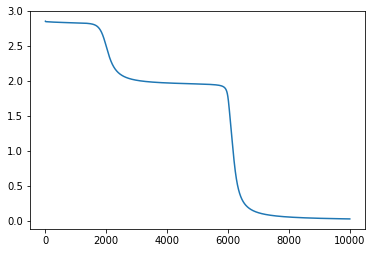

In [18]:
plt.plot(epoch_cost)

##  evolution strategy (ES). 

In [19]:
# [...] sigmoid(), forward(), pred() not modified

X = np.array([[0,0],[0,1],[1,0],[1,1]]) # features 4 * 2
Y = np.array([[0],[1],[1],[0]]) # labels 4 * 1

W1 = np.zeros((2,2)) # map from input to hidden
b1 = np.zeros((2,1)) # bias1 
W2 = np.zeros((1,2)) # map from hidden to output
b2 = np.zeros((1,1)) # bias2
epoch = 2000 # maximum training turns
for turn in range(epoch):
    print('turn:',turn,end=' ')
    epoch_cost = 0
    for index in range(X.shape[0]):
        x = X[index,:].reshape((-1,1))
        y = Y[index,:].reshape((-1,1))
        a,z,b,y_pred = forward(x,W1,W2,b1,b2) # feed forward

        cost = -y.dot(np.log(y_pred)) - (1-y).dot(np.log(1-y_pred)) # calculate cost
        epoch_cost += cost # calculate cumulative cost of this epoch

    if turn == 0 or epoch_cost < epoch_cost_best:
        epoch_cost_best = epoch_cost
        W1_best = W1
        b1_best = b1
        W2_best = W2
        b2_best = b2

    epsilon = 0.12 # perturb all weighs between -0.12 ~ 0.12
    W1 = W1_best + np.random.random((2,2)) * epsilon * 2 - epsilon
    b1 = b1_best + np.random.random((2,1)) * epsilon * 2 - epsilon
    W2 = W2_best + np.random.random((1,2)) * epsilon * 2 - epsilon
    b2 = b2_best + np.random.random((1,1)) * epsilon * 2 - epsilon

    print('cost:',epoch_cost)


print('prediction\n',pred(X,W1_best,W2_best,b1_best,b2_best))
print('ground-truth\n',Y)

turn: 0 cost: [[2.77258872]]
turn: 1 cost: [[2.77410694]]
turn: 2 cost: [[2.77876981]]
turn: 3 cost: [[2.77325885]]
turn: 4 cost: [[2.77399756]]
turn: 5 cost: [[2.77845364]]
turn: 6 cost: [[2.77312959]]
turn: 7 cost: [[2.77628938]]
turn: 8 cost: [[2.78323649]]
turn: 9 cost: [[2.77623517]]
turn: 10 cost: [[2.77269894]]
turn: 11 cost: [[2.77342758]]
turn: 12 cost: [[2.77509557]]
turn: 13 cost: [[2.77481369]]
turn: 14 cost: [[2.77321615]]
turn: 15 cost: [[2.77264069]]
turn: 16 cost: [[2.77707618]]
turn: 17 cost: [[2.77330336]]
turn: 18 cost: [[2.77303851]]
turn: 19 cost: [[2.7745296]]
turn: 20 cost: [[2.78033364]]
turn: 21 cost: [[2.7776651]]
turn: 22 cost: [[2.77426847]]
turn: 23 cost: [[2.78309416]]
turn: 24 cost: [[2.77346263]]
turn: 25 cost: [[2.78249909]]
turn: 26 cost: [[2.7737527]]
turn: 27 cost: [[2.77258739]]
turn: 28 cost: [[2.77259713]]
turn: 29 cost: [[2.77259053]]
turn: 30 cost: [[2.77508099]]
turn: 31 cost: [[2.7804824]]
turn: 32 cost: [[2.77341976]]
turn: 33 cost: [[2.77326

turn: 464 cost: [[2.1390917]]
turn: 465 cost: [[2.1339599]]
turn: 466 cost: [[2.12373902]]
turn: 467 cost: [[2.14430649]]
turn: 468 cost: [[2.13419588]]
turn: 469 cost: [[2.20612447]]
turn: 470 cost: [[2.09418303]]
turn: 471 cost: [[2.07858434]]
turn: 472 cost: [[2.07752109]]
turn: 473 cost: [[2.07910948]]
turn: 474 cost: [[2.1186644]]
turn: 475 cost: [[2.09851709]]
turn: 476 cost: [[2.11208247]]
turn: 477 cost: [[2.07244501]]
turn: 478 cost: [[2.10253905]]
turn: 479 cost: [[2.08973881]]
turn: 480 cost: [[2.08265338]]
turn: 481 cost: [[2.06930631]]
turn: 482 cost: [[2.06536179]]
turn: 483 cost: [[2.07027221]]
turn: 484 cost: [[2.08301521]]
turn: 485 cost: [[2.10664692]]
turn: 486 cost: [[2.10875973]]
turn: 487 cost: [[2.13157371]]
turn: 488 cost: [[2.08202892]]
turn: 489 cost: [[2.07988358]]
turn: 490 cost: [[2.06972454]]
turn: 491 cost: [[2.07204908]]
turn: 492 cost: [[2.06177976]]
turn: 493 cost: [[2.06445539]]
turn: 494 cost: [[2.06788041]]
turn: 495 cost: [[2.05735176]]
turn: 496 c

turn: 964 cost: [[0.13861717]]
turn: 965 cost: [[0.1340318]]
turn: 966 cost: [[0.13803086]]
turn: 967 cost: [[0.13108752]]
turn: 968 cost: [[0.1364063]]
turn: 969 cost: [[0.13187732]]
turn: 970 cost: [[0.12474427]]
turn: 971 cost: [[0.12092989]]
turn: 972 cost: [[0.11964257]]
turn: 973 cost: [[0.12097294]]
turn: 974 cost: [[0.12790628]]
turn: 975 cost: [[0.12333981]]
turn: 976 cost: [[0.11587329]]
turn: 977 cost: [[0.11155218]]
turn: 978 cost: [[0.10639067]]
turn: 979 cost: [[0.10319633]]
turn: 980 cost: [[0.10086507]]
turn: 981 cost: [[0.10417468]]
turn: 982 cost: [[0.10235734]]
turn: 983 cost: [[0.1049294]]
turn: 984 cost: [[0.1033497]]
turn: 985 cost: [[0.10216381]]
turn: 986 cost: [[0.10188944]]
turn: 987 cost: [[0.10101921]]
turn: 988 cost: [[0.10174306]]
turn: 989 cost: [[0.103207]]
turn: 990 cost: [[0.10433577]]
turn: 991 cost: [[0.10053105]]
turn: 992 cost: [[0.09845329]]
turn: 993 cost: [[0.09835029]]
turn: 994 cost: [[0.09718222]]
turn: 995 cost: [[0.1003322]]
turn: 996 cost:

turn: 1391 cost: [[0.00579706]]
turn: 1392 cost: [[0.00549507]]
turn: 1393 cost: [[0.0057348]]
turn: 1394 cost: [[0.00575617]]
turn: 1395 cost: [[0.00579196]]
turn: 1396 cost: [[0.0056129]]
turn: 1397 cost: [[0.00559076]]
turn: 1398 cost: [[0.00576757]]
turn: 1399 cost: [[0.00556836]]
turn: 1400 cost: [[0.00551336]]
turn: 1401 cost: [[0.00561038]]
turn: 1402 cost: [[0.00540911]]
turn: 1403 cost: [[0.00536535]]
turn: 1404 cost: [[0.00551605]]
turn: 1405 cost: [[0.00510631]]
turn: 1406 cost: [[0.00512226]]
turn: 1407 cost: [[0.00510855]]
turn: 1408 cost: [[0.00516856]]
turn: 1409 cost: [[0.00504426]]
turn: 1410 cost: [[0.00509985]]
turn: 1411 cost: [[0.00511975]]
turn: 1412 cost: [[0.00491777]]
turn: 1413 cost: [[0.00506401]]
turn: 1414 cost: [[0.00498194]]
turn: 1415 cost: [[0.00505609]]
turn: 1416 cost: [[0.00491277]]
turn: 1417 cost: [[0.00491571]]
turn: 1418 cost: [[0.00469229]]
turn: 1419 cost: [[0.00475399]]
turn: 1420 cost: [[0.00469212]]
turn: 1421 cost: [[0.00497514]]
turn: 1422

turn: 1749 cost: [[0.00034297]]
turn: 1750 cost: [[0.00034151]]
turn: 1751 cost: [[0.00032856]]
turn: 1752 cost: [[0.00032805]]
turn: 1753 cost: [[0.00034128]]
turn: 1754 cost: [[0.00033973]]
turn: 1755 cost: [[0.00032321]]
turn: 1756 cost: [[0.00033167]]
turn: 1757 cost: [[0.00033488]]
turn: 1758 cost: [[0.00032561]]
turn: 1759 cost: [[0.00033792]]
turn: 1760 cost: [[0.00031821]]
turn: 1761 cost: [[0.00031649]]
turn: 1762 cost: [[0.00032085]]
turn: 1763 cost: [[0.00031578]]
turn: 1764 cost: [[0.00029813]]
turn: 1765 cost: [[0.00030307]]
turn: 1766 cost: [[0.00030909]]
turn: 1767 cost: [[0.00030351]]
turn: 1768 cost: [[0.0002965]]
turn: 1769 cost: [[0.00030246]]
turn: 1770 cost: [[0.00029906]]
turn: 1771 cost: [[0.0003059]]
turn: 1772 cost: [[0.0002916]]
turn: 1773 cost: [[0.00028636]]
turn: 1774 cost: [[0.00027242]]
turn: 1775 cost: [[0.00028785]]
turn: 1776 cost: [[0.0002747]]
turn: 1777 cost: [[0.00026723]]
turn: 1778 cost: [[0.00027606]]
turn: 1779 cost: [[0.00026146]]
turn: 1780 c